In [1]:
import numpy as np

In [78]:
x = np.arange(8).reshape(8,1)

In [4]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [5]:
# def least_mean_squares(x, d, step, m):
#     # inicializar...
    
#     for n in range(x.size-(m-1)):
#         u = x[-n-1:-(M+1+n):-1]
#         erro = d - w.T@u
#         w+=step*u*erro
        
#     return

In [30]:
# traz pra frente;...
# x[::-1][:x.size-3]
M = 6 # roda M+1
for n in range(x.size-(M-1)):
    print(f'{x[-n-1:-(M+1+n):-1]}\n')

[[7]
 [6]
 [5]
 [4]
 [3]
 [2]]

[[6]
 [5]
 [4]
 [3]
 [2]
 [1]]

[[5]
 [4]
 [3]
 [2]
 [1]
 [0]]



In [2]:
import numpy as np
# import _paramcheck as _pchk


def lms(u, d, M, step, leak=0, initCoeffs=None, N=None, returnCoeffs=False):
    """
    Perform least-mean-squares (LMS) adaptive filtering on u to minimize error
    given by e=d-y, where y is the output of the adaptive filter.

    Parameters
    ----------
    u : array-like
        One-dimensional filter input.
    d : array-like
        One-dimensional desired signal, i.e., the output of the unknown FIR
        system which the adaptive filter should identify. Must have length >=
        len(u), or N+M-1 if number of iterations are limited (via the N
        parameter).
    M : int
        Desired number of filter taps (desired filter order + 1), must be
        non-negative.
    step : float
        Step size of the algorithm, must be non-negative.

    Optional Parameters
    -------------------
    leak : float
        Leakage factor, must be equal to or greater than zero and smaller than
        one. When greater than zero a leaky LMS filter is used. Defaults to 0,
        i.e., no leakage.
    initCoeffs : array-like
        Initial filter coefficients to use. Should match desired number of
        filter taps, defaults to zeros.
    N : int
        Number of iterations to run. Must be less than or equal to len(u)-M+1.
        Defaults to len(u)-M+1.
    returnCoeffs : boolean
        If true, will return all filter coefficients for every iteration in an
        N x M matrix. Does not include the initial coefficients. If false, only
        the latest coefficients in a vector of length M is returned. Defaults
        to false.

    Returns
    -------
    y : numpy.array
        Output values of LMS filter, array of length N.
    e : numpy.array
        Error signal, i.e, d-y. Array of length N.
    w : numpy.array
        Final filter coefficients in array of length M if returnCoeffs is
        False. NxM array containing all filter coefficients for all iterations
        otherwise.

    Raises
    ------
    TypeError
        If number of filter taps M is not type integer, number of iterations N
        is not type integer, or leakage leak is not type float/int.
    ValueError
        If number of iterations N is greater than len(u)-M, number of filter
        taps M is negative, or if step-size or leakage is outside specified
        range.

    Minimal Working Example
    -----------------------
    >>> import numpy as np
    >>>
    >>> np.random.seed(1337)
    >>> ulen = 2000
    >>> coeff = np.concatenate(([1], np.zeros(10), [-0.9], np.zeros(7), [0.1]))
    >>> u = np.random.randn(ulen)
    >>> d = np.convolve(u, coeff)
    >>>
    >>> M = 20  # No. of taps
    >>> step = 0.03  # Step size
    >>> y, e, w = lms(u, d, M, step)
    >>> print np.allclose(w, coeff)
    True

    Extended Example
    ----------------
    >>> import numpy as np
    >>>
    >>> np.random.seed(1337)
    >>> N = 1000
    >>> coeffs = np.concatenate(([-3], np.zeros(9), [6.9], np.zeros(8), [0.7]))
    >>> u = np.random.randn(20000)  # Note len(u) >> N but we limit iterations
    >>> d = np.convolve(u, coeffs)
    >>>
    >>> M = 20  # No. of taps
    >>> step = 0.02  # Step size
    >>> y, e, w = lms(u, d, M, step, N=N, returnCoeffs=True)
    >>> y.shape == (N,)
    True
    >>> e.shape == (N,)
    True
    >>> w.shape == (N, M)
    True
    >>> # Calculate mean square weight error
    >>> mswe = np.mean((w - coeffs)**2, axis=1)
    >>> # Should never increase so diff should above be > 0
    >>> diff = np.diff(mswe)
    >>> (diff <= 1e-10).all()
    True
    """
#     # Num taps check
#     _pchk.checkNumTaps(M)
    # Max iteration check
    if N is None:
        N = len(u)-M+1
#     _pchk.checkIter(N, len(u)-M+1)
#     # Check len(d)
#     _pchk.checkDesiredSignal(d, N, M)
#     # Step check
#     _pchk.checkStep(step)
#     # Leakage check
#     _pchk.checkLeakage(leak)
    # Init. coeffs check
    if initCoeffs is None:
        initCoeffs = np.zeros(M)
    else:
        _pchk.checkInitCoeffs(initCoeffs, M)

    # Initialization
    y = np.zeros(N)  # Filter output
    e = np.zeros(N)  # Error signal
    w = initCoeffs  # Initial filter coeffs
    leakstep = (1 - step*leak)
    if returnCoeffs:
        W = np.zeros((N, M))  # Matrix to hold coeffs for each iteration

    # Perform filtering
    for n in range(N):
        x = np.flipud(u[n:n+M])  # Slice to get view of M latest datapoints
        y[n] = np.dot(x, w)
        e[n] = d[n+M-1] - y[n]

        w = leakstep * w + step * x * e[n]
        y[n] = np.dot(x, w)
        if returnCoeffs:
            W[n] = w

    if returnCoeffs:
        w = W

    return y, e, w

In [33]:

np.random.seed(1337)
ulen = 2000
coeff = np.concatenate(([1], np.zeros(10), [-0.9], np.zeros(7), [0.1]))
print(coeff)
u = np.random.randn(ulen)
d = np.convolve(u, coeff)

M = 20  # No. of taps
step = 0.03  # Step size
# y, e, w = lms(u, d, M, step)
y, e, w = least_mean_squares(u, d, step, M)
np.set_printoptions(2)
# print (np.allclose(w, coeff))
# w
print (np.allclose(w[:,-1], coeff))
w[:,[-1]]

[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.9  0.   0.
  0.   0.   0.   0.   0.   0.1]
True


array([[ 1.00e+00],
       [-4.05e-18],
       [-1.08e-17],
       [-4.36e-17],
       [-2.19e-17],
       [-3.44e-18],
       [-1.37e-17],
       [-1.48e-17],
       [-1.51e-17],
       [ 2.57e-17],
       [ 8.66e-18],
       [-9.00e-01],
       [ 2.69e-17],
       [-8.72e-18],
       [ 4.77e-18],
       [ 2.45e-17],
       [ 3.26e-17],
       [-5.74e-18],
       [ 1.75e-17],
       [ 1.00e-01]])

## problemas no algoritimo

In [31]:
def least_mean_squares(u, d, step, M):
    N = u.size - M + 1
    y = np.zeros((N, 1)) # Filter output
    e = np.zeros((N, 1)) # Error signal
#     w = np.zeros((M, 1)) # Initial filter coeffs
    mt_W = np.zeros((M, N)) # Matrix to hold coeffs for each iteration

    for n in range(N):
        x = np.flipud(u[n:n + M])[:, np.newaxis] # Slice to get view of M latest data
        y[n] = mt_W[:, [n-1]].T @ x
        e[n] = d[n + M - 1] - y[n]

        mt_W[:, [n]] = mt_W[:,[n-1]] + step * x * e[n]
        y[n] = mt_W[:, [n]].T @ x

    return y, e, mt_W

In [69]:
from matplotlib.pyplot import*

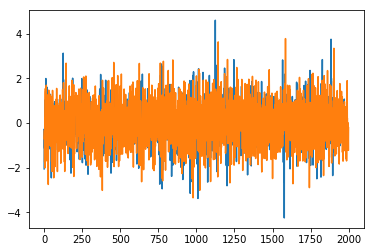

In [111]:
plot(y)
plot(u)

In [30]:
M = 10
a=np.random.rand(10,1)
n = 5
x = np.flipud(a[n:n + M])
print(f'''
{a}

{x}
''')


[[0.17]
 [0.8 ]
 [0.44]
 [0.59]
 [0.83]
 [0.87]
 [0.08]
 [0.02]
 [0.01]
 [0.67]]

[[0.67]
 [0.01]
 [0.02]
 [0.08]
 [0.87]]

